In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor
import typing as t

In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:

from razor.project.blocks.sourya_spark_blocks import NonSparkCols
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpace
from razor.project.blocks.sourya_spark_blocks import NonSparkPath
from razor.project.blocks.sourya_spark_blocks import DropDuplicates
from razor.project.blocks.sourya_spark_blocks import RenameCol
from razor.project.blocks.sourya_spark_blocks import ConcatData
from razor.project.blocks.sourya_spark_blocks import SelectDataDescribe
from razor.project.blocks.sourya_spark_blocks import SelectData
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpaceETA

In [4]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [5]:
import pandas as pd 

pd.read_csv(project_space_path('df_with_stats.csv'))

,filename,url,text,title,authors,description,generatorsite_name,site,publisher,source,keywords,label,generator,site_name,author_real_fake,site_real_fake,source_real_fake
0,gossipcop/real/gossipcop-913738/news content.json,https://www.independent.co.uk/news/people/tom-...,British diver Tom Daley and his husband Dustin...,Tom Daley and husband Dustin Lance Black relea...,[],Couple revealed they were expecting child thro...,NaN,@Independent,NaN,https://www.independent.co.uk,"Tom Daley,Dustin Lance Black",0,NaN,The Independent,"(nan, nan)","(0.8173076923076923, 0.18269230769230768)","(0.8470588235294118, 0.15294117647058825)"
1,gossipcop/real/gossipcop-887727/news content.json,https://www.teenvogue.com/story/dynasty-cw-fas...,Let’s be honest: we’ve reached peak nostalgia ...,"The '80s Version of 'Gossip Girl' Is Back, and...","['Faith Cummings', 'Faith Cumming']",In an exclusive interview with the cast and wa...,NaN,@TeenVogue,NaN,https://www.teenvogue.com,"news,dynasty,meredith markworth-pollack,the cw...",0,NaN,Teen Vogue,"(0.9166666666666666, 0.08333333333333333)","(0.8620689655172413, 0.13793103448275862)","(0.864406779661017, 0.13559322033898305)"
2,gossipcop/real/gossipcop-890190/news content.json,http://time.com/5004529/stranger-things-steve-...,Warning: This post contains spoilers for Stran...,Why This 'Stranger Things' Character Became a ...,['Ashley Hoffman'],How Steve went from bully to surprisingly hero...,NaN,@TIME,NaN,http://time.com,"stranger things, stranger things steve, strang...",0,NaN,Time,"(0.8, 0.2)","(0.8226950354609929, 0.1773049645390071)","(0.8626373626373627, 0.13736263736263737)"
3,gossipcop/real/gossipcop-894538/news content.json,http://olodomusics.com/serena-williams-star-st...,NaN,盘他直播app官网下载,[],NaN,NaN,NaN,NaN,http://olodomusics.com,NaN,0,NaN,NaN,"(nan, nan)","(nan, nan)","(1.0, 0.0)"
4,gossipcop/real/gossipcop-915430/news content.json,https://www.cosmopolitan.com/entertainment/cel...,This content is imported from YouTube. You may...,Kourtney Kardashian Just Said Having More Kids...,"['Emma Baty', 'Emma Baty Is The Associate Ente...",In a preview for the upcoming episode of ﻿KUWT...,NaN,@Cosmopolitan,https://facebook.com/Cosmopolitan,https://www.cosmopolitan.com,"kourtney kardashian, kourtney, kuwtk, kourtney...",0,NaN,Cosmopolitan,"(0.8209876543209876, 0.17901234567901234)","(0.8188405797101449, 0.18115942028985507)","(0.8015873015873016, 0.1984126984126984)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20762,gossipcop/real/gossipcop-902669/news content.json,https://www.today.com/parents/john-stamos-fian...,"John Stamos, 54, is on a fast track from ""uncl...",John Stamos' fiancee debuts baby bump on Insta...,[],"John Stamos' fiancee, Caitlin McHugh, shared a...",NaN,@TodayShow,NaN,https://www.today.com,NaN,0,NaN,TODAY.com,"(nan, nan)","(0.9214659685863874, 0.07853403141361257)","(0.9230769230769231, 0.07692307692307693)"
20763,gossipcop/real/gossipcop-890440/news content.json,https://www.billboard.com/articles/news/956424...,"Rich Cronin, a singer and songwriter for the l...","LFO Singer Rich Cronin, 35, Dies of Cancer",['Monica Herrera'],"<p>Rich Cronin, a singer and songwriter for th...",NaN,@billboard,NaN,https://www.billboard.com,NaN,0,NaN,Billboard,"(0.7857142857142857, 0.21428571428571427)","(0.8631578947368421, 0.1368421052631579)","(0.8707865168539326, 0.12921348314606743)"
20764,gossipcop/real/gossipcop-915417/news content.json,https://www.etonline.com/liam-gallagher-steps-...,Liam Gallagher is stepping in.\n\nThe Oasis si...,Liam Gallagher Steps In for Ariana Grande With...,['Jennifer Drysdale'],A source told ET on Wednesday that Grande was ...,NaN,"{'identifier': '@etnow', 'id': 23603092}",NaN,https://www.etonline.com,"Awards, Music, News, Ariana Grande",0,NaN,Entertainment Tonight,"(0.8899082568807339, 0.11009174311926606)","(0.8894389438943895, 0.11056105610561057)","(0.8877086494688923, 0.11229135053110774)"
20765,gossipcop/real/gossipcop-927457/news content

In [6]:
# @rf.block
# class NonSparkPath:
#     # Atomic input - csv filename relative to project space
#     ip_path: str
#     selected_cols: rf.Output[t.Any]
#     # Atomic output of type spark DataFrame.
#     op_path: rf.Output[str]
#     def run(self):
#         self.op_path.put(project_space_path(self.ip_path))
        

# @rf.block
# class NonSparkCols:
#     cols_list: t.Any
#     # Atomic input - csv filename relative to project space
#     selected_cols: rf.Output[t.Any]
#     # Atomic output of type spark DataFrame.
#     def run(self):
#         self.selected_cols.put(self.cols_list)
        

In [7]:
# @rf.block
# class ReadCsvProjectSpace(SparkBlock):
#     filename:str
#     data: rf.Output[DataFrame]
#     def run(self):
#         df = self.spark.read.csv(self.filename, header = True)
#         print("Data Schema")
#         df.printSchema()
#         self.data.put(df)
        

# @rf.block
# class SelectData(SparkBlock):
#     wanted_cols: t.Any
#     inputData: DataFrame
#     outputData: rf.Output[DataFrame]
#     def run(self):
#         df = self.inputData
#         df_selected = df.select(self.wanted_cols)
#         df_selected.show()
#         self.outputData.put(df_selected)
        
        
        
        
        

In [8]:
nsp = NonSparkPath(ip_path='df_with_stats.csv')
nsc = NonSparkCols(cols_list = ['title','label'])
rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
sd = SelectData(wanted_cols=nsc.selected_cols, inputData=rcp.data, config={}, source="")

# rcp.executor = rf.ProcessExecutor
# sd.executor = rf.ProcessExecutor

In [9]:
pipe = rf.Pipeline('pipeline_sd_2', targets = [sd])

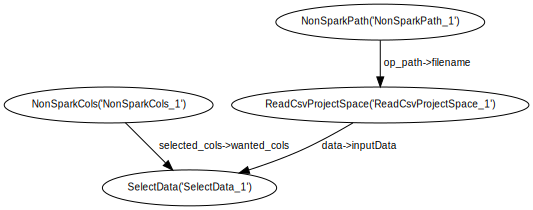

In [10]:
pipe

In [11]:
pipe.execute()

log path: /tmp/tmpstl1y47j/pipeline_sd_2


NonSparkCols_1 tcp://0.0.0.0:52129
NonSparkPath_1 tcp://0.0.0.0:60959
SelectData_1 tcp://0.0.0.0:61746
ReadCsvProjectSpace_1 tcp://0.0.0.0:60252
Data Schema
root
 |-- filename: string (nullable = true)
 |-- url: string (nullable = true)
 |-- text: string (nullable = true)
 |-- title: string (nullable = true)
 |-- authors: string (nullable = true)
 |-- description: string (nullable = true)
 |-- generatorsite_name: string (nullable = true)
 |-- site: string (nullable = true)
 |-- publisher: string (nullable = true)
 |-- source: string (nullable = true)
 |-- keywords: string (nullable = true)
 |-- label: string (nullable = true)
 |-- generator: string (nullable = true)
 |-- site_name: string (nullable = true)
 |-- author_real_fake: string (nullable = true)
 |-- site_real_fake: string (nullable = true)
 |-- source_real_fake: string (nullable = true)

+--------------------+--------------------+
|               title|               label|
+--------------------+--------------------+
|        

{}

In [12]:
razor.api.pipelines.save(pipe)

TypeError: 'NoneType' object is not subscriptable